## 입력과 출력에 따른 함수의 분류

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml


Cloning into 'noviceml'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 185 (delta 62), reused 74 (delta 24), pack-reused 48
Receiving objects: 100% (185/185), 7.87 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [3]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)


### 다변수 스칼라함수

- 목적함수이다.

- 목적함수는 함수값을 줄이면서 어떤 목적을 달성하는 함수로 비용함수 혹은 손실함수로 불린다.

- 입력이 여러 개이고 출력이 하나이다.

- 그래프를 그리면 의미있는 정보를 얻는다.

   - 예)

      - 경사도 벡터의 방향이 어느방향인지 등고선 그래프로 알 수 있다.

- 최적화 문제를 다룰 때 필요하다.

- 실수가 세 개일 경우 그림을 그릴 수 없다.

   - 3차원 공간에서 점 하나에 대해 함숫값을 계산하면 그 함수값을 나타낼 좌표축이 더이상 남아있지 않다.


- 대표적인 식: f(x,y) = x + y

- 정의역: R^2

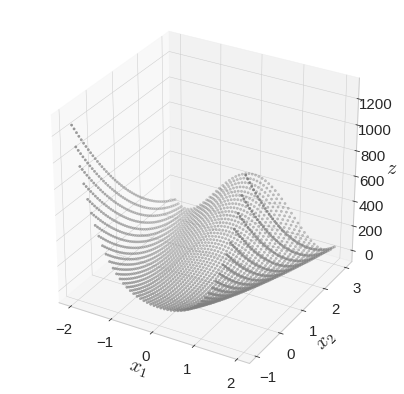

In [4]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

x1 = np.linspace(-2, 2, 50)

x2 = np.linspace(-1, 3, 50)

"""
x1,x2에 대한 설명입니다.
함수의 정의역을 설정한다.
다변수 함수이므로 변수의 개수만큼 각 변수에 대해서 범위를 설정한다.
"""


X1, X2 = np.meshgrid(x1, x2)
"""
np.meshgrid()를 사용하면 각 변수에 대한 그리디를 생성한다.
1차원 어레이인x1,x2가 np.meshgrid를 통해서 2차원 어ㅓ레이로 형성이 된다.
평면 위에 한 점을 만들 수 있다.
"""
Z = 50*(X2 - X1**2)**2 + (2-X1)**2 #식 계산


#ax.scatter3D(X1, X2, Z, marker='.', color='gray')

if file_print == True :
    fig.savefig("imgs/chap3/fig3-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-3.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

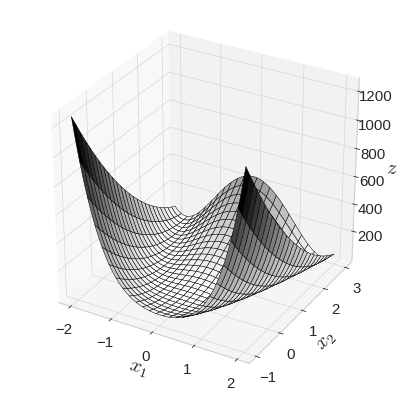

In [5]:
#점을 빼곡히 찍어서 연속된 곡면이 나타나게했다.
fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-4.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

이변수 함수에서 함숫값을 제안하면 곡면이 곡선으로 바뀌고 이러한 곡선이 모여서 만드는 그림을 등고선그래프라고 한다.

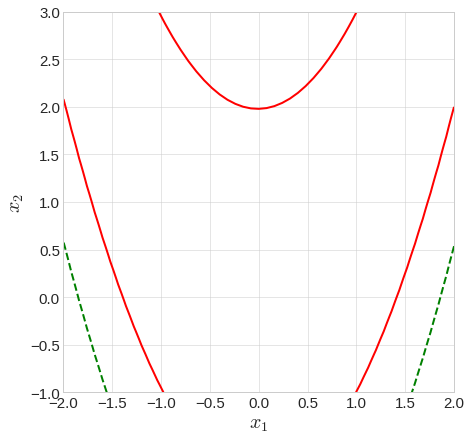

In [6]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

contours = ax.contour(X1, X2, Z, levels=[200, 600],  colors=['r','g','b'], 
            linestyles=['solid','dashed', 'dotted'])

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

plt.show()

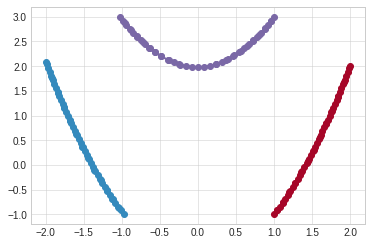

In [7]:
segs200=contours.collections[0].get_segments()

plt.plot(segs200[0][:,0], segs200[0][:,1], 'o-')
plt.plot(segs200[1][:,0], segs200[1][:,1], 'o-')
plt.plot(segs200[2][:,0], segs200[2][:,1], 'o-')

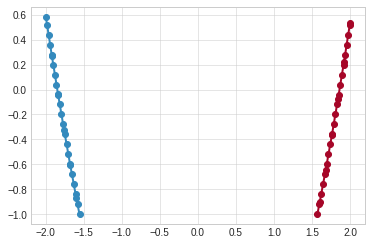

In [8]:
segs600=contours.collections[1].get_segments()

plt.plot(segs600[0][:,0], segs600[0][:,1], 'o-')
plt.plot(segs600[1][:,0], segs600[1][:,1], 'o-')

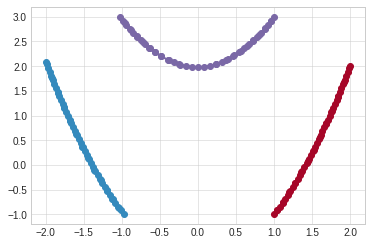

In [9]:
paths200=contours.collections[0].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths200[0].vertices[:,0], paths200[0].vertices[:,1], 'o-')
plt.plot(paths200[1].vertices[:,0], paths200[1].vertices[:,1], 'o-')
plt.plot(paths200[2].vertices[:,0], paths200[2].vertices[:,1], 'o-')
plt.show()

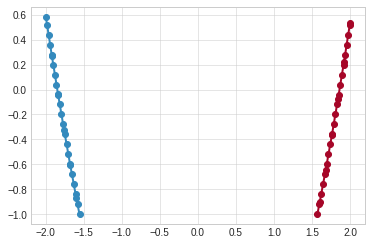

In [10]:
paths600=contours.collections[1].get_paths()
# print(paths[0].vertices)
# print(paths[1].vertices)
plt.plot(paths600[0].vertices[:,0], paths600[0].vertices[:,1], 'o-')
plt.plot(paths600[1].vertices[:,0], paths600[1].vertices[:,1], 'o-')

plt.show()

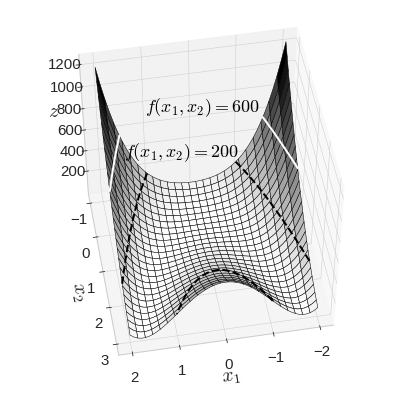

In [11]:
#고정된 함수값을 곡선으로 표현한다.

fig = plt.figure(figsize=(7, 7))

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-1, 3, 51)
X1, X2 = np.meshgrid(x1, x2)
Z = 50*(X2 - X1**2)**2 + (2-X1)**2

ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")
#ax.plot_wireframe(X1, X2, Z, cmap=plt.cm.OrRd, edgecolor="k")

ax.plot3D(paths200[0].vertices[:,0], paths200[0].vertices[:,1], [200]*paths200[0].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[1].vertices[:,0], paths200[1].vertices[:,1], [200]*paths200[1].vertices.shape[0], 
          lw=2, color='k', linestyle='--')
ax.plot3D(paths200[2].vertices[:,0], paths200[2].vertices[:,1], [200]*paths200[2].vertices.shape[0], 
          lw=2, color='k', linestyle='--')

ax.plot3D(paths600[0].vertices[:,0], paths600[0].vertices[:,1], [600]*paths600[0].vertices.shape[0], 
          lw=2, color='w', linestyle='-')
ax.plot3D(paths600[1].vertices[:,0], paths600[1].vertices[:,1], [600]*paths600[1].vertices.shape[0], 
          lw=2, color='w', linestyle='-')

ax.text(1.5, -1,  400, r"$f(x_1, x_2)=200$", color='k', fontsize=18)
ax.text(1., -1, 800, r"$f(x_1, x_2)=600$", color='k', fontsize=18)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

ax.view_init(50, 80)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 다변수 벡터함숫

- 입력과 출력의 개수에 따라 분류한다.

- 여러개의 입력과 여러개의 출력

   - 입력 m개가 출력 n개로 변환되는 벡터함수

   
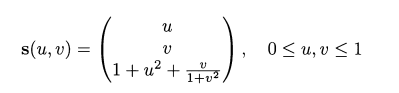

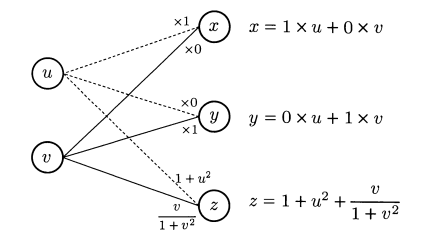

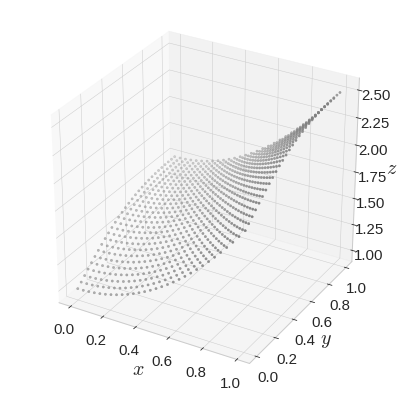

In [12]:
#입력 두개: u,v
#출력: x,y,z
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

u = np.linspace(0,1,30)
v = np.linspace(0,1,30)
U, V = np.meshgrid(u, v)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))

ax.scatter3D(X, Y, Z, marker='.', color='gray')
# ax.plot_surface(X, Y, Z, color='gray')


if file_print == True :
    fig.savefig("imgs/chap3/fig3-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-7.pdf", format='pdf', bbox_inches='tight')
    
plt.show()


### 여러 함수가 합성된 합성함수

- 여러 함수를 합성하여 좋은 출력을 만들기 위해서 중요하다.

- 가공의 개념이다.

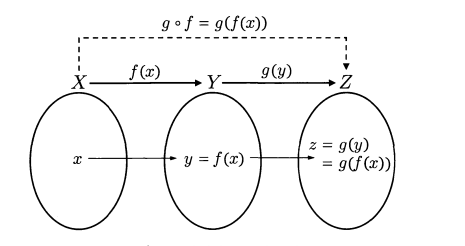



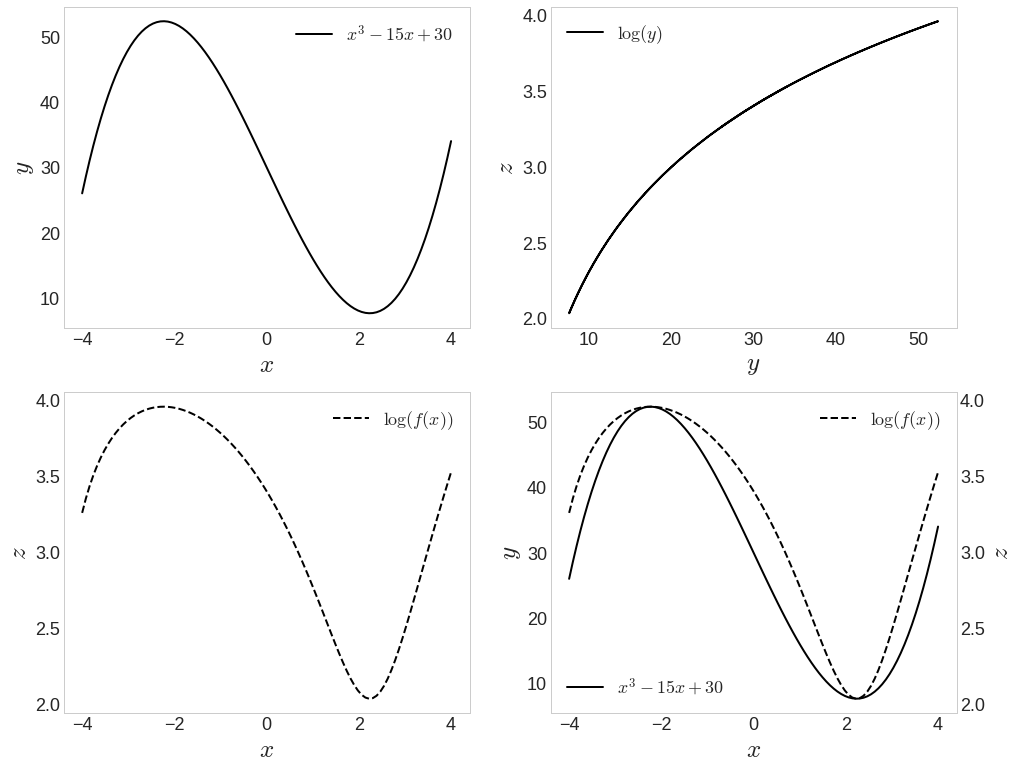

In [13]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((16,13))

plt.subplots_adjust(wspace=0.2, hspace=0.2)
x = np.linspace(-4, 4, 100)
y = x**3 - 15*x + 30
z = np.log(y)

ax[0,0].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel('$x$', fontsize=25)
ax[0,0].set_ylabel('$y$', fontsize=25)
ax[0,0].legend(fontsize=18)
ax[0,0].grid(False)

ax[0,1].plot(y,z, label=r'$\log(y)$', color='k')
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel('$y$', fontsize=25)
ax[0,1].set_ylabel('$z$', fontsize=25)
ax[0,1].legend(fontsize=18)
ax[0,1].grid(False)

ax[1,0].plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax[1,0].xaxis.set_tick_params(labelsize=18)
ax[1,0].yaxis.set_tick_params(labelsize=18)
ax[1,0].set_xlabel('$x$', fontsize=25)
ax[1,0].set_ylabel('$z$', fontsize=25)
ax[1,0].legend(fontsize=18)
ax[1,0].grid(False)

ax[1,1].plot(x,y, label=r'$x^3 -15x + 30$', color='k')
ax[1,1].xaxis.set_tick_params(labelsize=18)
ax[1,1].yaxis.set_tick_params(labelsize=18)
ax[1,1].set_xlabel('$x$', fontsize=25)
ax[1,1].set_ylabel('$y$', fontsize=25)
ax[1,1].legend(loc='lower left', fontsize=18)
ax[1,1].grid(False)

ax_ = ax[1,1].twinx()
ax_.plot(x,z, '--', label=r'$\log(f(x))$', color='k')
ax_.yaxis.set_tick_params(labelsize=18)
ax_.set_ylabel('$z$', fontsize=25)
ax_.grid(False)
ax_.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap3/fig3-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap3/fig3-13.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 소프트맥스 함수

- 다변수 벡터함수이다.

- 출력이 확률이다. 

   - 가장 큰 확률을 가지는 것을 정답으로 출력

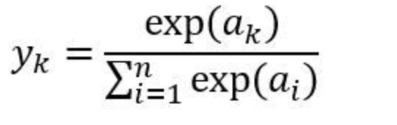

In [18]:
#python으로 소프트맥스 함수 구현

import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y

array([0.0158, 0.0058, 0.1166, 0.8618])

### 여러 가지 함수를 합성하여 만든 초간단 분류기 실습
